In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('./data/cars_details.csv')

In [3]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [4]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [5]:
df1 = df.groupby(['name','year']).apply(lambda x: x['name'].count()).reset_index(name="quantity")
df1.sort_values(['year'], ascending=True, inplace=True)
df1

,name,year,quantity
1254,Maruti 800 AC BSII,1992,1
1516,Maruti Gypsy E MG410W ST,1995,1
1039,Mahindra Jeep CL 500 MDI,1996,1
1042,Mahindra Jeep MM 540,1996,1
1040,Mahindra Jeep CL 500 MDI,1997,1
...,...,...,...
1781,Maruti Wagon R LXI,2020,1
782,Hyundai Venue SX Opt Turbo BSIV,2020,1
373,Ford Freestyle Titanium Plus,2020,1
1710,Maruti Swift VXI,2020,2


In [6]:
df2 = df.groupby('owner').apply(lambda d: d['km_driven'].mean()).reset_index(name="average_mileage")
df2.sort_values(['average_mileage'], ascending=False, inplace=True)
df2

,owner,average_mileage
4,Third Owner,99304.506579
1,Fourth & Above Owner,99138.135802
2,Second Owner,81783.518987
0,First Owner,56015.009887
3,Test Drive Car,4155.000000


In [27]:
fig = go.Figure()
colors = ['#78AB50',
          '#C03028',
          '#A086A0',
          '#B8A038',
          '#70F8F8']
fig.add_trace(go.Barpolar(
    r = list(df2['average_mileage']),
    theta = list(df2['owner']),
    name = 'Average Mileage',
    marker_color=colors,
    marker_line_color='black',
    hoverinfo = ['all'],
    opacity=0.7
))
fig.update_layout(
    font_family="Courier New",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green",
    title = 'used cars average mileages by types of previous owners'
)

In [26]:
fig.update_layout(
    font_family="Courier New",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green",
    title='Used cars analysis by type of previous owners',
    font_size=12,
    legend_font_size=15,
    polar_angularaxis_rotation=90,
    width=500,
    height=500,
    
    polar = dict(
        bgcolor = "rgb(223, 223, 223)",
        angularaxis =
            dict(
                linewidth = 3,
                showline = True,
                linecolor='black'
            ),
        radialaxis = 
            dict(
                showline = True,
                linewidth = 2,
                gridcolor = "white",
                gridwidth = 2,
                )
        ),
    )
fig.show()

In [13]:
df3 = df.copy()
scaler = MinMaxScaler()
df3[['km_driven','selling_price']] = scaler.fit_transform(df3[['km_driven','selling_price']])

C:\Users\tranh\AppData\Local\Temp\ipykernel_3776\1387428560.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




[(-0.2, 0.6)]

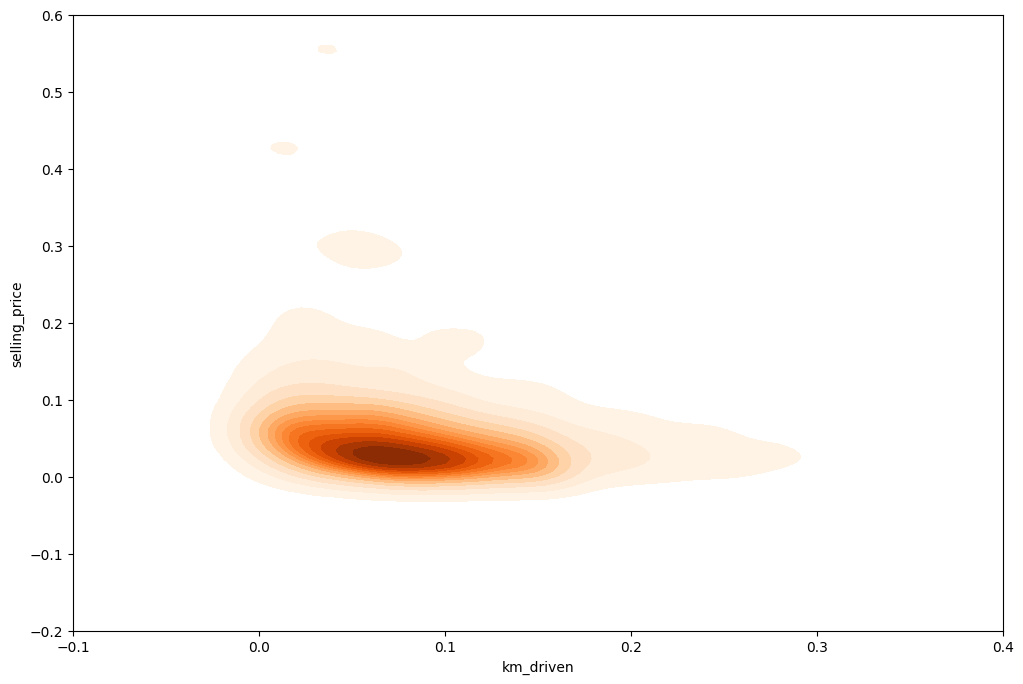

In [11]:
plt.figure(figsize=(12,8))
kd = sns.kdeplot(x='km_driven', y='selling_price', data=df3, cmap="Oranges", fill=True, shade=True,n_levels=15)
kd.set(xlim=(-0.1,0.4))
kd.set(ylim=(-0.2,0.6))